##### **Installing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
from keras.utils import to_categorical  

import os
import cv2 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

Using TensorFlow backend.


diabetic-retinopathy-detection
prepossessed-arrays-of-binary-data



In [2]:
temp_df=pd.read_csv('../input/diabetic-retinopathy-detection/trainLabels.csv.zip') 
print(temp_df.head()) 
image=temp_df['image'].str.split('_',n=1,expand=True)  
df = pd.DataFrame()

      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


In [3]:
df['eye_side']=list(image[1]) 
df.head()

,eye_side
0,left
1,right
2,left
3,right
4,left


In [4]:
df['patient_id']=list(image[0])
df.head()

,eye_side,patient_id
0,left,10
1,right,10
2,left,13
3,right,13
4,left,15


In [5]:
df['path']='../input/diabetic-retinopathy-detection/' 
df['path']=df['path'].str.cat(temp_df['image']+'.jpeg') 
df.head()

,eye_side,patient_id,path
0,left,10,../input/diabetic-retinopathy-detection/10_lef...
1,right,10,../input/diabetic-retinopathy-detection/10_rig...
2,left,13,../input/diabetic-retinopathy-detection/13_lef...
3,right,13,../input/diabetic-retinopathy-detection/13_rig...
4,left,15,../input/diabetic-retinopathy-detection/15_lef...


In [6]:
df['level']=temp_df['level']
df.head()

,eye_side,patient_id,path,level
0,left,10,../input/diabetic-retinopathy-detection/10_lef...,0
1,right,10,../input/diabetic-retinopathy-detection/10_rig...,0
2,left,13,../input/diabetic-retinopathy-detection/13_lef...,0
3,right,13,../input/diabetic-retinopathy-detection/13_rig...,0
4,left,15,../input/diabetic-retinopathy-detection/15_lef...,1


In [7]:
df['level_cat'] = df['level'].map(lambda x: to_categorical(x, 1+df['level'].max()))
df.head()

,eye_side,patient_id,path,level,level_cat
0,left,10,../input/diabetic-retinopathy-detection/10_lef...,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
1,right,10,../input/diabetic-retinopathy-detection/10_rig...,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
2,left,13,../input/diabetic-retinopathy-detection/13_lef...,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
3,right,13,../input/diabetic-retinopathy-detection/13_rig...,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
4,left,15,../input/diabetic-retinopathy-detection/15_lef...,1,"[0.0, 1.0, 0.0, 0.0, 0.0]"


**Visualization**


In [8]:
sizes = df['level'].values 
print(sizes[0:5])

[0 0 0 0 1]


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


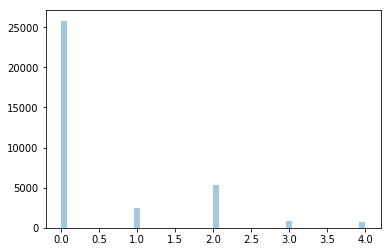

In [9]:
sns.distplot(sizes, kde=False)

In [10]:
pd.value_counts(sizes) 

0    25810
2     5292
1     2443
3      873
4      708
dtype: int64

In [11]:
sum_E=0
for i in range (1,5):
    L1_df=pd.DataFrame()
    L1_df =df [df.level==i]
    x=len(L1_df)
    sum_E=x+sum_E
print(sum_E)

9316


**loading my saving Binary data**

In [12]:
B_df=pd.read_csv('../input/prepossessed-arrays-of-binary-data/1000_Binary Dataframe')
B_df=B_df.drop('Unnamed: 0',axis=1)
B_df.head(10)

,exists,eye_side,level,path,patient_id,level_cat
0,True,left,0,../input/diabetic-retinopathy-detection/10_lef...,10,[1. 0.]
1,True,right,0,../input/diabetic-retinopathy-detection/10_rig...,10,[1. 0.]
2,True,left,0,../input/diabetic-retinopathy-detection/13_lef...,13,[1. 0.]
3,True,right,0,../input/diabetic-retinopathy-detection/13_rig...,13,[1. 0.]
4,True,left,0,../input/diabetic-retinopathy-detection/17_lef...,17,[1. 0.]
5,True,left,0,../input/diabetic-retinopathy-detection/19_lef...,19,[1. 0.]
6,True,right,0,../input/diabetic-retinopathy-detection/19_rig...,19,[1. 0.]
7,True,left,0,../input/diabetic-retinopathy-detection/20_lef...,20,[1. 0.]
8,True,right,0,../input/diabetic-retinopathy-detection/20_rig...,20,[1. 0.]
9,True,left,0,../input/diabetic-retinopathy-detection/21_lef...,21,[1. 0.]


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


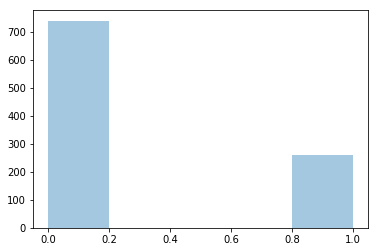

In [13]:
sizes =B_df['level'].values
sns.distplot(sizes, kde=False); # Visualizing levels in dataset

**loading My numpy array which I saved**

In [14]:
Binary_90 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_90.npz')
X_90=Binary_90['a']
Binary_128 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_128.npz')
X_128=Binary_128['a']
Binary_264 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_264.npz')
X_264=Binary_264['a']
y=B_df['level'].values


print(X_90.shape)
print(X_128.shape)
print(X_264.shape)
print(y.shape)

(1000, 24300)
(1000, 49152)
(1000, 209088)
(1000,)


In [15]:
print("Shape before reshaping X_90" +str(X_90.shape))
X_90=X_90.reshape(1000,90,90,3)
print("Shape after reshaping X_90" +str(X_90.shape))
print("\n\n")

print("Shape before reshaping X_128" +str(X_128.shape))
X_128=X_128.reshape(1000,128,128,3)
print("Shape after reshaping X_128" +str(X_128.shape))
print("\n\n")

print("Shape before reshaping X_264" +str(X_264.shape))
X_264=X_264.reshape(1000,264,264,3)
print("Shape after reshaping X_264" +str(X_264.shape))


Shape before reshaping X_90(1000, 24300)
Shape after reshaping X_90(1000, 90, 90, 3)



Shape before reshaping X_128(1000, 49152)
Shape after reshaping X_128(1000, 128, 128, 3)



Shape before reshaping X_264(1000, 209088)
Shape after reshaping X_264(1000, 264, 264, 3)


**Confirming that image path on 1st index of data frame is same as the image at 1st index of the Np Arrays**

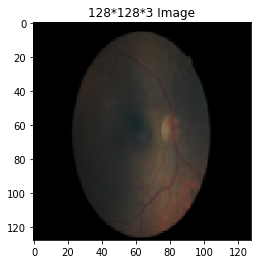

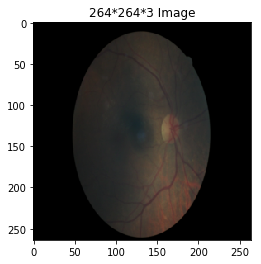

In [16]:
plt.title("128*128*3 Image")
plt.imshow(X_128[1])
plt.show()

plt.title("264*264*3 Image")
plt.imshow(X_264[1])
plt.show()

**Its seem to be same now thats good for us**

**Now I have my X and Y. Now its time for spliting and training**

In [17]:
y.shape

(1000,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_128,y, test_size=0.10, random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test_Categorical=to_categorical(y_test)
y_categorical =to_categorical(y)

## CNN Model

In [19]:
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
from keras import losses
from keras.optimizers import Adam, Adagrad
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import GridSearchCV
import keras
#import talos as ta

**Talos Model For HyperParameter Optimization**

In [20]:

def Talos_Model(X_train, y_train, X_test, y_test, params):
    #parameters defined
    lr = params['lr']
    epochs=params['epochs']
    dropout_rate=params['dropout']
    optimizer=params['optimizer']
    loss=params['loss']
    last_activation=params['last_activation']
    activation=params['activation']
    clipnorm=params['clipnorm']
    decay=params['decay']
    momentum=params['momentum']
    l1=params['l1']
    l2=params['l2']
    No_of_CONV_and_Maxpool_layers=params['No_of_CONV_and_Maxpool_layers']
    No_of_Dense_Layers =params['No_of_Dense_Layers']
    No_of_Units_in_dense_layers=params['No_of_Units_in_dense_layers']
    Kernal_Size=params['Kernal_Size']
    Conv2d_filters=params['Conv2d_filters']
    pool_size_p=params['pool_size']
    padding_p=params['padding']
    
    model=Sequential()
    
    for i in range(0,No_of_CONV_and_Maxpool_layers):
        model.add(Conv2D(Conv2d_filters, Kernal_Size ,padding=padding_p))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=pool_size_p,strides=(2,2)))
    
    
    model.add(Flatten())
    
    for i in range (0,No_of_Dense_Layers):
        model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
    
    
    model.add(Dense(units=20,activation=activation))
    
    model.add(Dense(units=2,activation=activation))
    if optimizer=="Adam":
        opt=keras.optimizers.Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    if optimizer=="Adagrad":
        opt=keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    if optimizer=="sgd":
        opt=keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    
    model.compile(loss=loss,optimizer=opt,
                 metrics=['accuracy'])
    
    out = model.fit(X_train, y_train, epochs=params['epochs'])

    return out,model

In [21]:
params = {'lr': (0.1, 0.01,1 ),
     'epochs': [10,5,15],
     'dropout': (0, 0.40, 0.8),
     'optimizer': ["Adam","Adagrad","sgd"],
     'loss': ["binary_crossentropy","mean_squared_error","mean_absolute_error"],
     'last_activation': ["softmax","sigmoid"],
     'activation' :["relu","selu","linear"],
     'clipnorm':(0.0,0.5,1),
     'decay':(1e-6,1e-4,1e-2),
     'momentum':(0.9,0.5,0.2),
     'l1': (0.01,0.001,0.0001),
     'l2': (0.01,0.001,0.0001),
     'No_of_CONV_and_Maxpool_layers':[2,3],
     'No_of_Dense_Layers': [2,3,4],
     'No_of_Units_in_dense_layers':[128,64,32,256],
     'Kernal_Size':[(2,2),(4,4),(6,6)],
     'Conv2d_filters':[60,40,80,120],
     'pool_size':[(2,2),(4,4)],
     'padding':["valid","same"]
    }

**Randomized Search For Hyperparameter tuning**

In [22]:

def Randomized_Model(lr=0.01,dropout=0.5,optimizer="adam",loss='mean_squared_error',
                    last_activation="softmax",activation="relu",clipnorm=0.1,
                    decay=1e-2,momentum=0.5,l1=0.01,l2=0.001,No_of_CONV_and_Maxpool_layers=3,
                    No_of_Dense_Layers=3,No_of_Units_in_dense_layers=24,Conv2d_filters=60):
       
    
    
    #model sequential
    model=Sequential()
    
    for i in range(0,No_of_CONV_and_Maxpool_layers):
        model.add(Conv2D(Conv2d_filters, (2,2) ,padding="same"))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())
    
    for i in range (0,No_of_Dense_Layers):
        model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
    
    model.add(Dropout(dropout))
    model.add(Dense(units=20,activation=activation))
    
    model.add(Dense(units=2,activation=activation))
    if optimizer=="Adam":
        opt=keras.optimizers.Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    if optimizer=="Adagrad":
        opt=keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    if optimizer=="sgd":
        opt=keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    
    model.compile(loss=loss,optimizer=opt,
                 metrics=['accuracy'])
    
    

    return model

**Parameters of Randomized Search**

In [23]:


params = {'lr': (0.1, 0.01,1,0.001 ),
     'epochs': [10,5,15,30],
     'dropout': (0, 0.40, 0.8),
     'optimizer': ["Adam","Adagrad","sgd"],
     'loss': ["binary_crossentropy","mean_squared_error","mean_absolute_error"],
     'last_activation': ["softmax","sigmoid"],
     'activation' :["relu","selu","linear"],
     'clipnorm':(0.0,0.5,1),
     'decay':(1e-6,1e-4,1e-2),
     'momentum':(0.9,0.5,0.2),
     'l1': (0.01,0.001,0.0001),
     'l2': (0.01,0.001,0.0001),
     'No_of_CONV_and_Maxpool_layers':[2,3],
     'No_of_Dense_Layers': [2,3,4,5],
     'No_of_Units_in_dense_layers':[128,64,32,256],
     'Conv2d_filters':[60,40,80,120,220]
     
    }


In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer
# model class to use in the scikit random search CV 
model = KerasClassifier(build_fn=Randomized_Model, epochs=10, batch_size=20, verbose=1)
grid = RandomizedSearchCV(estimator=model, cv=KFold(3), param_distributions=params, 
                          verbose=20,  n_iter=10, n_jobs=1)


In [25]:
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] optimizer=Adagrad, momentum=0.2, lr=0.01, loss=mean_absolute_error, last_activation=sigmoid, l2=0.001, l1=0.0001, epochs=15, dropout=0.8, decay=0.01, clipnorm=0.0, activation=relu, No_of_Units_in_dense_layers=128, No_of_Dense_Layers=4, No_of_CONV_and_Maxpool_layers=3, Conv2d_filters=60 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/15
600/600 [==============================] - 5s 8ms/step - loss: 0.6545 - acc: 0.7200
Epoch 2/15
600/600 [==============================] - 0s 657us/step - loss: 0.4470 - acc: 0.7267
Epoch 3/15
600/600 [==============================] - 0s 651us/step - loss: 0.4190 - acc: 0.7267
Epoch 4/15
600/600 [==============================] - 0s 649us/step - loss: 0.3923 - acc: 0.7267
Epoch 5/15
600/600 [==============================] - 0s 649us/step - loss: 0.3814 - acc: 0.7267
Epoch 6/15
600/600 [==============================] - 0s 650us/step - loss: 0.3744 - acc: 0.7267
Epoch 7/15
600/600 [==============================] - 0s 646us/step - loss: 0.3642 - acc: 0.7267
Epoch 8/15
600/600 [==============================] - 0s 782us/step - loss: 0.3687 - acc: 0.7267
Epoch 9/15
600/600 [==============================] - 0s 723us/step - loss: 0.3588 - acc: 0.7267
Epoch 10/15
600/600 [==============================] - 0s 660us/step - loss: 0.3580 - acc: 0.7267
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 1s 2ms/step - loss: 1.2280 - acc: 0.7233
Epoch 2/15
600/600 [==============================] - 0s 660us/step - loss: 0.5441 - acc: 0.7333
Epoch 3/15
600/600 [==============================] - 0s 667us/step - loss: 0.4965 - acc: 0.7333
Epoch 4/15
600/600 [==============================] - 0s 663us/step - loss: 0.4737 - acc: 0.7333
Epoch 5/15
600/600 [==============================] - 0s 666us/step - loss: 0.4557 - acc: 0.7333
Epoch 6/15
600/600 [==============================] - 0s 674us/step - loss: 0.4440 - acc: 0.7333
Epoch 7/15
600/600 [==============================] - 0s 669us/step - loss: 0.4424 - acc: 0.7333
Epoch 8/15
600/600 [==============================] - 0s 680us/step - loss: 0.4293 - acc: 0.7333
Epoch 9/15
600/600 [==============================] - 0s 687us/step - loss: 0.4250 - acc: 0.7333
Epoch 10/15
600/600 [==============================] - 0s 690us/step - loss: 0.4236 - acc: 0.7333
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.0s remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 1s 2ms/step - loss: 0.7306 - acc: 0.7267
Epoch 2/15
600/600 [==============================] - 0s 697us/step - loss: 0.4729 - acc: 0.7500
Epoch 3/15
600/600 [==============================] - 0s 685us/step - loss: 0.4371 - acc: 0.7500
Epoch 4/15
600/600 [==============================] - 0s 727us/step - loss: 0.4155 - acc: 0.7500
Epoch 5/15
600/600 [==============================] - 0s 698us/step - loss: 0.3994 - acc: 0.7500
Epoch 6/15
600/600 [==============================] - 0s 706us/step - loss: 0.3870 - acc: 0.7500
Epoch 7/15
600/600 [==============================] - 0s 707us/step - loss: 0.3774 - acc: 0.7500
Epoch 8/15
600/600 [==============================] - 0s 682us/step - loss: 0.3751 - acc: 0.7500
Epoch 9/15
600/600 [==============================] - 0s 677us/step - loss: 0.3665 - acc: 0.7500
Epoch 10/15
600/600 [==============================] - 0s 682us/step - loss: 0.3700 - acc: 0.7500
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.5s remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 3s 4ms/step - loss: 52.7503 - acc: 0.2450
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 19.0573 - acc: 0.3250
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 31.2831 - acc: 0.2225
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 14.0278 - acc: 0.3817
Epoch 5/15
600/600 [==============================] - 1s 1ms/step - loss: 16.1728 - acc: 0.4483
Epoch 6/15
600/600 [==============================] - 1s 1ms/step - loss: 14.1243 - acc: 0.4200
Epoch 7/15
600/600 [==============================] - 1s 1ms/step - loss: 9.8101 - acc: 0.4958
Epoch 8/15
600/600 [==============================] - 1s 1ms/step - loss: 22.3326 - acc: 0.3050
Epoch 9/15
600/600 [==============================] - 1s 1ms/step - loss: 12.8579 - acc: 0.4358
Epoch 10/15
600/600 [==============================] - 1s 1ms/step - loss: 11.8810 - acc: 0.5000
Epoch 11/15
600/600 [===================

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   42.2s remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 2s 4ms/step - loss: 60.2183 - acc: 0.2208
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 16.5002 - acc: 0.4200
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 10.2737 - acc: 0.5367
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 7.8968 - acc: 0.5742
Epoch 5/15
600/600 [==============================] - 1s 1ms/step - loss: 7.1726 - acc: 0.5833
Epoch 6/15
600/600 [==============================] - 1s 1ms/step - loss: 11.0091 - acc: 0.5333
Epoch 7/15
600/600 [==============================] - 1s 1ms/step - loss: 8.6750 - acc: 0.5183
Epoch 8/15
600/600 [==============================] - 1s 1ms/step - loss: 6.4574 - acc: 0.5992
Epoch 9/15
600/600 [==============================] - 1s 1ms/step - loss: 5.9205 - acc: 0.6125
Epoch 10/15
600/600 [==============================] - 1s 1ms/step - loss: 5.9282 - acc: 0.6042
Epoch 11/15
600/600 [========================

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.5s remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 63.9452 - acc: 0.1992
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 22.2546 - acc: 0.3208
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 19.0553 - acc: 0.3558
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 10.9759 - acc: 0.4783
Epoch 5/15
600/600 [==============================] - 1s 1ms/step - loss: 9.2777 - acc: 0.5350
Epoch 6/15
600/600 [==============================] - 1s 1ms/step - loss: 9.2487 - acc: 0.5150
Epoch 7/15
600/600 [==============================] - 1s 1ms/step - loss: 9.9106 - acc: 0.4567
Epoch 8/15
600/600 [==============================] - 1s 1ms/step - loss: 8.1990 - acc: 0.4950
Epoch 9/15
600/600 [==============================] - 1s 1ms/step - loss: 7.2300 - acc: 0.5375
Epoch 10/15
600/600 [==============================] - 1s 1ms/step - loss: 6.8704 - acc: 0.5475
Epoch 11/15
600/600 [========================

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4490 - acc: 0.7183
Epoch 2/30
600/600 [==============================] - 0s 552us/step - loss: 0.3007 - acc: 0.7267
Epoch 3/30
600/600 [==============================] - 0s 552us/step - loss: 0.2990 - acc: 0.7267
Epoch 4/30
600/600 [==============================] - 0s 553us/step - loss: 0.2991 - acc: 0.7267
Epoch 5/30
600/600 [==============================] - 0s 545us/step - loss: 0.2993 - acc: 0.7267
Epoch 6/30
600/600 [==============================] - 0s 549us/step - loss: 0.2990 - acc: 0.7267
Epoch 7/30
600/600 [==============================] - 0s 556us/step - loss: 0.2989 - acc: 0.7267
Epoch 8/30
600/600 [==============================] - 0s 551us/step - loss: 0.2991 - acc: 0.7267
Epoch 9/30
600/600 [==============================] - 0s 579us/step - loss: 0.2996 - acc: 0.7267
Epoch 10/30
600/600 [==============================] - 0s 555us/step - loss: 0.2987 - acc: 0.7267
Epoch 11/30
600/600 [==========

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3939 - acc: 0.7283
Epoch 2/30
600/600 [==============================] - 0s 563us/step - loss: 0.2989 - acc: 0.7333
Epoch 3/30
600/600 [==============================] - 0s 563us/step - loss: 0.2976 - acc: 0.7333
Epoch 4/30
600/600 [==============================] - 0s 570us/step - loss: 0.2987 - acc: 0.7333
Epoch 5/30
600/600 [==============================] - 0s 574us/step - loss: 0.2972 - acc: 0.7333
Epoch 6/30
600/600 [==============================] - 0s 689us/step - loss: 0.2971 - acc: 0.7333
Epoch 7/30
600/600 [==============================] - 0s 634us/step - loss: 0.2973 - acc: 0.7333
Epoch 8/30
600/600 [==============================] - 0s 583us/step - loss: 0.2969 - acc: 0.7333
Epoch 9/30
600/600 [==============================] - 0s 551us/step - loss: 0.2975 - acc: 0.7333
Epoch 10/30
600/600 [==============================] - 0s 549us/step - loss: 0.2963 - acc: 0.7333
Epoch 11/30
600/600 [==========

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3845 - acc: 0.7417
Epoch 2/30
600/600 [==============================] - 0s 642us/step - loss: 0.2839 - acc: 0.7500
Epoch 3/30
600/600 [==============================] - 0s 558us/step - loss: 0.2828 - acc: 0.7500
Epoch 4/30
600/600 [==============================] - 0s 559us/step - loss: 0.2814 - acc: 0.7500
Epoch 5/30
600/600 [==============================] - 0s 556us/step - loss: 0.2849 - acc: 0.7500
Epoch 6/30
600/600 [==============================] - 0s 558us/step - loss: 0.2825 - acc: 0.7500
Epoch 7/30
600/600 [==============================] - 0s 551us/step - loss: 0.2829 - acc: 0.7500
Epoch 8/30
600/600 [==============================] - 0s 561us/step - loss: 0.2814 - acc: 0.7500
Epoch 9/30
600/600 [==============================] - 0s 555us/step - loss: 0.2809 - acc: 0.7500
Epoch 10/30
600/600 [==============================] - 0s 552us/step - loss: 0.2798 - acc: 0.7500
Epoch 11/30
600/600 [==========

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 12.9454 - acc: 0.5217
Epoch 2/15
600/600 [==============================] - 0s 825us/step - loss: 5.3362 - acc: 0.5733
Epoch 3/15
600/600 [==============================] - 0s 821us/step - loss: 3.6169 - acc: 0.6367
Epoch 4/15
600/600 [==============================] - 0s 825us/step - loss: 3.1780 - acc: 0.6833
Epoch 5/15
600/600 [==============================] - 0s 820us/step - loss: 3.0315 - acc: 0.7100
Epoch 6/15
600/600 [==============================] - 0s 826us/step - loss: 2.9467 - acc: 0.7167
Epoch 7/15
600/600 [==============================] - 0s 831us/step - loss: 2.8673 - acc: 0.7267
Epoch 8/15
600/600 [==============================] - 1s 845us/step - loss: 2.8131 - acc: 0.7267
Epoch 9/15
600/600 [==============================] - 0s 819us/step - loss: 2.7843 - acc: 0.7300
Epoch 10/15
600/600 [==============================] - 0s 824us/step - loss: 2.7347 - acc: 0.7283
Epoch 11/15
600/600 [=========

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 14.2232 - acc: 0.5333
Epoch 2/15
600/600 [==============================] - 0s 810us/step - loss: 7.9622 - acc: 0.5767
Epoch 3/15
600/600 [==============================] - 0s 820us/step - loss: 4.5735 - acc: 0.6233
Epoch 4/15
600/600 [==============================] - 0s 822us/step - loss: 3.1527 - acc: 0.6983
Epoch 5/15
600/600 [==============================] - 0s 813us/step - loss: 2.9511 - acc: 0.7367
Epoch 6/15
600/600 [==============================] - 0s 823us/step - loss: 2.8413 - acc: 0.7267
Epoch 7/15
600/600 [==============================] - 1s 853us/step - loss: 2.7754 - acc: 0.7350
Epoch 8/15
600/600 [==============================] - 0s 820us/step - loss: 2.7422 - acc: 0.7333
Epoch 9/15
600/600 [==============================] - 0s 819us/step - loss: 2.6587 - acc: 0.7333
Epoch 10/15
600/600 [==============================] - 0s 814us/step - loss: 2.6422 - acc: 0.7333
Epoch 11/15
600/600 [=========

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  2.1min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 15.0640 - acc: 0.4817
Epoch 2/15
600/600 [==============================] - 0s 816us/step - loss: 5.8267 - acc: 0.6300
Epoch 3/15
600/600 [==============================] - 0s 826us/step - loss: 3.4608 - acc: 0.7267
Epoch 4/15
600/600 [==============================] - 1s 844us/step - loss: 3.1375 - acc: 0.7383
Epoch 5/15
600/600 [==============================] - 0s 820us/step - loss: 2.9582 - acc: 0.7467
Epoch 6/15
600/600 [==============================] - 0s 824us/step - loss: 2.8990 - acc: 0.7500
Epoch 7/15
600/600 [==============================] - 0s 820us/step - loss: 2.7978 - acc: 0.7500
Epoch 8/15
600/600 [==============================] - 0s 826us/step - loss: 2.7499 - acc: 0.7500
Epoch 9/15
600/600 [==============================] - 0s 818us/step - loss: 2.7021 - acc: 0.7500
Epoch 10/15
600/600 [==============================] - 0s 821us/step - loss: 2.6766 - acc: 0.7500
Epoch 11/15
600/600 [=========

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.3min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 8.6512 - acc: 0.5125
Epoch 2/15
600/600 [==============================] - 1s 966us/step - loss: 4.9317 - acc: 0.5000
Epoch 3/15
600/600 [==============================] - 1s 959us/step - loss: 4.1558 - acc: 0.5000
Epoch 4/15
600/600 [==============================] - 1s 966us/step - loss: 2.7474 - acc: 0.5017
Epoch 5/15
600/600 [==============================] - 1s 961us/step - loss: 2.1035 - acc: 0.5000
Epoch 6/15
600/600 [==============================] - 1s 959us/step - loss: 1.8819 - acc: 0.4992
Epoch 7/15
600/600 [==============================] - 1s 963us/step - loss: 1.6990 - acc: 0.5075
Epoch 8/15
600/600 [==============================] - 1s 963us/step - loss: 1.5511 - acc: 0.5375
Epoch 9/15
600/600 [==============================] - 1s 969us/step - loss: 1.4581 - acc: 0.5392
Epoch 10/15
600/600 [==============================] - 1s 964us/step - loss: 1.3687 - acc: 0.5575
Epoch 11/15
600/600 [==========

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.6min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 5.5402 - acc: 0.4950
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 2.7152 - acc: 0.5000
Epoch 3/15
600/600 [==============================] - 1s 963us/step - loss: 1.9762 - acc: 0.5025
Epoch 4/15
600/600 [==============================] - 1s 961us/step - loss: 1.5889 - acc: 0.5442
Epoch 5/15
600/600 [==============================] - 1s 959us/step - loss: 1.3610 - acc: 0.5750
Epoch 6/15
600/600 [==============================] - 1s 971us/step - loss: 1.2063 - acc: 0.6117
Epoch 7/15
600/600 [==============================] - 1s 961us/step - loss: 1.1021 - acc: 0.5967
Epoch 8/15
600/600 [==============================] - 1s 1ms/step - loss: 1.0207 - acc: 0.6167
Epoch 9/15
600/600 [==============================] - 1s 976us/step - loss: 0.9411 - acc: 0.6408
Epoch 10/15
600/600 [==============================] - 1s 963us/step - loss: 0.8849 - acc: 0.6450
Epoch 11/15
600/600 [==============

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  2.8min remaining:    0.0s


Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 6.3419 - acc: 0.4933
Epoch 2/15
600/600 [==============================] - 1s 955us/step - loss: 2.7947 - acc: 0.5000
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 2.0516 - acc: 0.4992
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 1.6250 - acc: 0.5192
Epoch 5/15
600/600 [==============================] - 1s 959us/step - loss: 1.3768 - acc: 0.5475
Epoch 6/15
600/600 [==============================] - 1s 967us/step - loss: 1.2078 - acc: 0.5917
Epoch 7/15
600/600 [==============================] - 1s 961us/step - loss: 1.0884 - acc: 0.6325
Epoch 8/15
600/600 [==============================] - 1s 960us/step - loss: 1.0058 - acc: 0.6292
Epoch 9/15
600/600 [==============================] - 1s 963us/step - loss: 0.9373 - acc: 0.6442
Epoch 10/15
600/600 [==============================] - 1s 963us/step - loss: 0.8774 - acc: 0.6583
Epoch 11/15
600/600 [==============

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.0min remaining:    0.0s


Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: inf - acc: 0.7067
Epoch 2/5
600/600 [==============================] - 1s 1ms/step - loss: inf - acc: 0.7267
Epoch 3/5
600/600 [==============================] - 1s 1ms/step - loss: inf - acc: 0.7267
Epoch 4/5
600/600 [==============================] - 1s 1ms/step - loss: inf - acc: 0.7267
Epoch 5/5
600/600 [==============================] - 0s 497us/step
[CV]  optimizer=sgd, momentum=0.2, lr=1, loss=mean_absolute_error, last_activation=softmax, l2=0.001, l1=0.001, epochs=5, dropout=0, decay=0.0001, clipnorm=0.5, activation=selu, No_of_Units_in_dense_layers=32, No_of_Dense_Layers=4, No_of_CONV_and_Maxpool_layers=2, Conv2d_filters=80, score=0.7566666642824809, total=   7.4s
[CV] optimizer=sgd, momentum=0.2, lr=1, loss=mean_absolute_error, last_activation=softmax, l2=0.001, l1=0.001, epochs=5, dropout=0, decay=0.0001, clipnorm=0.5, activation=selu, No_of_Units_in_dense_layers=32, No_of_Dense_Layers=4, No_of_CONV_and

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  3.2min remaining:    0.0s


Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: nan - acc: 0.7117
Epoch 2/5
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.7333
Epoch 3/5
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.7333
Epoch 4/5
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.7333
Epoch 5/5
600/600 [==============================] - 0s 501us/step
[CV]  optimizer=sgd, momentum=0.2, lr=1, loss=mean_absolute_error, last_activation=softmax, l2=0.001, l1=0.001, epochs=5, dropout=0, decay=0.0001, clipnorm=0.5, activation=selu, No_of_Units_in_dense_layers=32, No_of_Dense_Layers=4, No_of_CONV_and_Maxpool_layers=2, Conv2d_filters=80, score=0.7433333357175191, total=   8.2s
[CV] optimizer=sgd, momentum=0.2, lr=1, loss=mean_absolute_error, last_activation=softmax, l2=0.001, l1=0.001, epochs=5, dropout=0, decay=0.0001, clipnorm=0.5, activation=selu, No_of_Units_in_dense_layers=32, No_of_Dense_Layers=4, No_of_CONV_and

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  3.3min remaining:    0.0s


Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: nan - acc: 0.7383
Epoch 2/5
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.7500
Epoch 3/5
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.7500
Epoch 4/5
600/600 [==============================] - 1s 1ms/step - loss: nan - acc: 0.7500
Epoch 5/5
600/600 [==============================] - 0s 504us/step
[CV]  optimizer=sgd, momentum=0.2, lr=1, loss=mean_absolute_error, last_activation=softmax, l2=0.001, l1=0.001, epochs=5, dropout=0, decay=0.0001, clipnorm=0.5, activation=selu, No_of_Units_in_dense_layers=32, No_of_Dense_Layers=4, No_of_CONV_and_Maxpool_layers=2, Conv2d_filters=80, score=0.7099999944368999, total=   7.6s
[CV] optimizer=Adam, momentum=0.5, lr=1, loss=binary_crossentropy, last_activation=sigmoid, l2=0.0001, l1=0.0001, epochs=10, dropout=0.4, decay=1e-06, clipnorm=0.0, activation=relu, No_of_Units_in_dense_layers=32, No_of_Dense_Layers=3, No_of_CON

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.4min remaining:    0.0s


Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 2730.8687 - acc: 0.4975
Epoch 2/10
600/600 [==============================] - 1s 834us/step - loss: 767.4014 - acc: 0.5000
Epoch 3/10
600/600 [==============================] - 1s 839us/step - loss: 563.5682 - acc: 0.5000
Epoch 4/10
600/600 [==============================] - 1s 863us/step - loss: 424.5755 - acc: 0.5000
Epoch 5/10
600/600 [==============================] - 1s 840us/step - loss: 333.2655 - acc: 0.5000
Epoch 6/10
600/600 [==============================] - 0s 826us/step - loss: 269.2602 - acc: 0.5000
Epoch 7/10
600/600 [==============================] - 1s 840us/step - loss: 222.1463 - acc: 0.5000
Epoch 8/10
600/600 [==============================] - 1s 850us/step - loss: 186.1582 - acc: 0.5000
Epoch 9/10
600/600 [==============================] - 1s 838us/step - loss: 157.8641 - acc: 0.5000
Epoch 10/10
600/600 [==============================] - 0s 405us/step
[CV]  optimizer=Adam, momentum=0.5, lr=1,

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  3.6min remaining:    0.0s


Epoch 1/10
600/600 [==============================] - 3s 6ms/step - loss: 221426.0471 - acc: 0.0167
Epoch 2/10
600/600 [==============================] - 1s 846us/step - loss: 2593.0801 - acc: 0.0000e+00
Epoch 3/10
600/600 [==============================] - 1s 842us/step - loss: 2375.8183 - acc: 0.0000e+00
Epoch 4/10
600/600 [==============================] - 1s 848us/step - loss: 2207.6628 - acc: 0.0000e+00
Epoch 5/10
600/600 [==============================] - 0s 830us/step - loss: 2088.4685 - acc: 0.0000e+00
Epoch 6/10
600/600 [==============================] - 1s 990us/step - loss: 1994.4678 - acc: 0.0000e+00
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 1914.9756 - acc: 0.0000e+00
Epoch 8/10
600/600 [==============================] - 1s 868us/step - loss: 1844.8918 - acc: 0.0000e+00
Epoch 9/10
600/600 [==============================] - 1s 838us/step - loss: 1781.4235 - acc: 0.0000e+00
Epoch 10/10
600/600 [==============================] - 0s 394us/step
[

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.1min finished


Epoch 1/15
900/900 [==============================] - 5s 5ms/step - loss: 0.6273 - acc: 0.7278
Epoch 2/15
900/900 [==============================] - 1s 679us/step - loss: 0.4373 - acc: 0.7367
Epoch 3/15
900/900 [==============================] - 1s 681us/step - loss: 0.4049 - acc: 0.7367
Epoch 4/15
900/900 [==============================] - 1s 685us/step - loss: 0.3908 - acc: 0.7367
Epoch 5/15
900/900 [==============================] - 1s 682us/step - loss: 0.3776 - acc: 0.7367
Epoch 6/15
900/900 [==============================] - 1s 819us/step - loss: 0.3719 - acc: 0.7367
Epoch 7/15
900/900 [==============================] - 1s 724us/step - loss: 0.3642 - acc: 0.7367
Epoch 8/15
900/900 [==============================] - 1s 680us/step - loss: 0.3612 - acc: 0.7367
Epoch 9/15
900/900 [==============================] - 1s 691us/step - loss: 0.3600 - acc: 0.7367
Epoch 10/15
900/900 [==============================] - 1s 676us/step - loss: 0.3544 - acc: 0.7367
Epoch 11/15
900/900 [==========

**Best Params of Randomized search**

In [26]:
best_params=grid_result.best_params_
best_params

{'optimizer': 'Adagrad',
 'momentum': 0.2,
 'lr': 0.01,
 'loss': 'mean_absolute_error',
 'last_activation': 'sigmoid',
 'l2': 0.001,
 'l1': 0.0001,
 'epochs': 15,
 'dropout': 0.8,
 'decay': 0.01,
 'clipnorm': 0.0,
 'activation': 'relu',
 'No_of_Units_in_dense_layers': 128,
 'No_of_Dense_Layers': 4,
 'No_of_CONV_and_Maxpool_layers': 3,
 'Conv2d_filters': 60}

In [27]:

from sklearn.metrics import accuracy_score

y=grid_result.predict(X_test)
random=accuracy_score(y, y_test)
print("Base Accuracy ",random)

best_random = grid_result.best_estimator_
y1=best_random.predict(X_test)
Best=accuracy_score(y1, y_test)
print("Best Accuracy " ,Best)


print('Improvement of {:0.2f}%.'.format( 100 * (Best - random) / random))

100/100 [==============================] - 2s 17ms/step
Base Accuracy  0.76
100/100 [==============================] - 0s 351us/step
Best Accuracy  0.76
Improvement of 0.00%.


In [28]:
def Best_param_Model(best_params):
       
    lr=best_params["lr"]
    dropout=best_params["dropout"]
    optimizer=best_params["optimizer"]
    loss=best_params["loss"]
    last_activation=best_params["last_activation"]
    activation=best_params["activation"]
    clipnorm=best_params["clipnorm"]
    decay=best_params["decay"]
    momentum=best_params["momentum"]
    l1=best_params["l1"]
    l2=best_params["l2"]
    No_of_CONV_and_Maxpool_layers=best_params["No_of_CONV_and_Maxpool_layers"]
    No_of_Dense_Layers=best_params["No_of_Dense_Layers"]
    No_of_Units_in_dense_layers=best_params["No_of_Units_in_dense_layers"]
    Conv2d_filters=best_params["Conv2d_filters"]
    
    #model sequential
    model=Sequential()
    
    for i in range(0,No_of_CONV_and_Maxpool_layers):
        model.add(Conv2D(Conv2d_filters, (2,2) ,padding="same"))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())
    
    for i in range (0,No_of_Dense_Layers):
        model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
    
    
    model.add(Dense(units=20,activation=activation))
    
    model.add(Dense(units=2,activation=activation))
    if optimizer=="Adam":
        opt=keras.optimizers.Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    if optimizer=="Adagrad":
        opt=keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    if optimizer=="sgd":
        opt=keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    
    model.compile(loss=loss,optimizer=opt,
                 metrics=['accuracy'])
    
    

    return model

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 6s 7ms/step - loss: 0.6951 - acc: 0.7367 - val_loss: 0.4865 - val_acc: 0.7600
Epoch 2/100
900/900 [==============================] - 1s 684us/step - loss: 0.4131 - acc: 0.7367 - val_loss: 0.3724 - val_acc: 0.7600
Epoch 3/100
900/900 [==============================] - 1s 682us/step - loss: 0.3733 - acc: 0.7367 - val_loss: 0.3392 - val_acc: 0.7600
Epoch 4/100
900/900 [==============================] - 1s 688us/step - loss: 0.3572 - acc: 0.7367 - val_loss: 0.3264 - val_acc: 0.7600
Epoch 5/100
900/900 [==============================] - 1s 687us/step - loss: 0.3484 - acc: 0.7367 - val_loss: 0.3219 - val_acc: 0.7600
Epoch 6/100
900/900 [==============================] - 1s 683us/step - loss: 0.3437 - acc: 0.7367 - val_loss: 0.3187 - val_acc: 0.7600
Epoch 7/100
900/900 [==============================] - 1s 686us/step - loss: 0.3400 - acc: 0.7367 - val_loss: 0.3172 - val_acc: 0.7600
Epoch 8/100

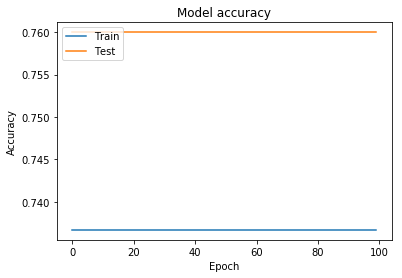

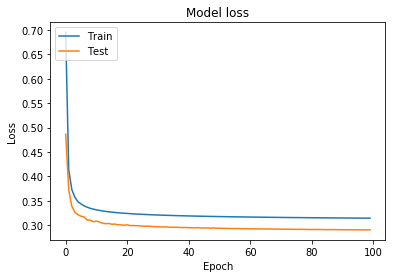

In [29]:

Binary_model=Best_param_Model(best_params)
history =Binary_model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test_Categorical))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
Binary_model.evaluate(X_test,y_test_Categorical)

100/100 [==============================] - 0s 439us/step


[0.29066407680511475, 0.76]

**Visualizing my CNN model**

In [31]:
y=B_df['level'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_128,y, test_size=0.10, random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test_Categorical=to_categorical(y_test)

In [32]:

model = Sequential()
model.add(Conv2D(16,kernel_size = (5,5),activation = 'relu', activity_regularizer=regularizers.l2(1e-8)))
model.add(Conv2D(32,kernel_size = (5,5),activation = 'relu', activity_regularizer = regularizers.l2(1e-8)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,kernel_size = (5,5),activation = 'relu', activity_regularizer = regularizers.l2(1e-8)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(128,activation = 'relu',kernel_size = (3,3),activity_regularizer = regularizers.l2(1e-8)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(64,activation = 'tanh',activity_regularizer = regularizers.l2(1e-8)))
model.add(Dropout(0.2))
model.add(Dense(16,activation = 'tanh',activity_regularizer = regularizers.l2(1e-8)))
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train, epochs = 10 ,batch_size = 16,validation_data=(X_test,y_test_Categorical))
model.summary()


Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 6s 7ms/step - loss: 0.6181 - acc: 0.7267 - val_loss: 0.5533 - val_acc: 0.7600
Epoch 2/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5861 - acc: 0.7367 - val_loss: 0.5584 - val_acc: 0.7600
Epoch 3/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5843 - acc: 0.7367 - val_loss: 0.5529 - val_acc: 0.7600
Epoch 4/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5797 - acc: 0.7367 - val_loss: 0.5566 - val_acc: 0.7600
Epoch 5/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5833 - acc: 0.7378 - val_loss: 0.5479 - val_acc: 0.7600
Epoch 6/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5890 - acc: 0.7367 - val_loss: 0.5485 - val_acc: 0.7600
Epoch 7/10
900/900 [==============================] - 1s 1ms/step - loss: 0.5803 - acc: 0.7344 - val_loss: 0.5489 - val_acc: 0.7600
Epoch 8/10
900/900 [==========

Accuracy Measures
[Helping Material](http://comprna.upf.edu/courses/Master_AGB/2_ClassificationAlgorithms/Lecture_Accuracy.pdf)

In [33]:
from sklearn.metrics import confusion_matrix
prediction=model.predict(X_test)
y_pred=[]
for i in prediction:
    y_pred.append(i.argmax())
y_pred=np.asarray(y_pred)
true_negative,false_positive,false_negative,true_positive=confusion_matrix(y_test, y_pred).ravel()

print("true_negative: ",true_negative)
print("false_positive: ",false_positive)
print("false_negative: ",false_negative)
print("true_positive: ",true_positive)
print("\n\n Accuracy Measures\n\n")
Sensitivity=true_positive/(true_positive+false_negative)
print("Sensitivity: ",Sensitivity)

False_Positive_Rate=false_positive/(false_positive+true_negative)
print("False_Positive_Rate: ",False_Positive_Rate)

Specificity=true_negative/(false_positive + true_negative)
print("Specificity: ",Specificity)

#FDR à 0 means that very few of our predictions are wrong
False_Discovery_Rate=false_positive/(false_positive+true_positive)
print("False_Discovery_Rate: ",False_Discovery_Rate)

Positive_Predictive_Value =true_positive/(true_positive+false_positive)
print("Positive_Predictive_Value: ",Positive_Predictive_Value)



true_negative:  76
false_positive:  0
false_negative:  24
true_positive:  0


 Accuracy Measures


Sensitivity:  0.0
False_Positive_Rate:  0.0
Specificity:  1.0
False_Discovery_Rate:  nan
Positive_Predictive_Value:  nan


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars


In [34]:
a=np.expand_dims( X_train[10],axis=0)
a.shape
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


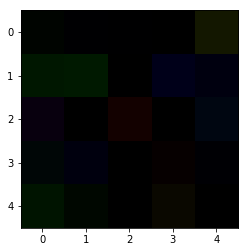

In [35]:
top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :,15 ])

**Acheiving 76% accuracy till now on 1000 examples**